------

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Vamos a leer los data frames y ver la informacion que nos arroja, para ver si podemos trabajar con ellas 

In [2]:
import pandas as pd

In [4]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path('..') / 'data'  # carpeta de datos relativa al notebook

# ← Lectura con separador fijo ';' (sin engine, sin low_memory)
orders         = pd.read_csv(DATA_DIR / 'instacart_orders.csv',  sep=';', encoding='utf-8')
products       = pd.read_csv(DATA_DIR / 'products.csv',         sep=';', encoding='utf-8')
aisles         = pd.read_csv(DATA_DIR / 'aisles.csv',           sep=';', encoding='utf-8')
departments    = pd.read_csv(DATA_DIR / 'departments.csv',      sep=';', encoding='utf-8')
order_products = pd.read_csv(DATA_DIR / 'order_products.csv',   sep=';', encoding='utf-8')

# chequeo rápido (lo puedes dejar como ya lo tenías)
for name, df in [
    ('orders', orders),
    ('products', products),
    ('aisles', aisles),
    ('departments', departments),
    ('order_products', order_products),
]:
    print(f'\n{name}: {df.shape}')
    display(df.head())



orders: (478967, 6)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



products: (49694, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



aisles: (134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



departments: (21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



order_products: (4545007, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
# mostrar información del DataFrame
orders.info()
orders.describe()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [4]:
# mostrar información del DataFrame
products.info()
products.describe()
products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,aisle_id,department_id
count,49694.000000,49694.000000,49694.000000
mean,24847.500000,67.773192,11.728478
std,14345.566475,38.317265,5.850314
min,1.000000,1.000000,1.000000
25%,12424.250000,35.000000,7.000000
50%,24847.500000,69.000000,13.000000
75%,37270.750000,100.000000,17.000000
max,49694.000000,134.000000,21.000000


In [6]:
# mostrar información del DataFrame
aisles.info()
aisles.describe
aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
# mostrar información del DataFrame
departments.info()
departments.describe()
departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id
count,21.000000
mean,11.000000
std,6.204837
min,1.000000
25%,6.000000
50%,11.000000
75%,16.000000
max,21.000000


In [7]:
# mostrar información del DataFrame
order_products.info(show_counts=True)
order_products.describe()
order_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
count,4.545007e+06,4.545007e+06,4.544171e+06,4.545007e+06
mean,1.711166e+06,2.558084e+04,8.351669e+00,5.905025e-01
std,9.850955e+05,1.409552e+04,7.080368e+00,4.917411e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,8.608170e+05,1.353500e+04,3.000000e+00,0.000000e+00
50%,1.711530e+06,2.527200e+04,6.000000e+00,1.000000e+00
75%,2.561311e+06,3.793500e+04,1.100000e+01,1.000000e+00
max,3.421079e+06,4.969400e+04,6.400000e+01,1.000000e+00


## Conclusiones

Los datos venian  mal acomodados, en cada uno de los data frames la informacion viene aglomerada en una sola columna ya que vienen separadas por punto y coma, por lo tanto para leer cada archivo csv, se tuvo que especificar que venian se parados por punto y coma 


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Vamos a ir paso por paso para ir limpiando cada uno de los data frame para que su uso sea mas sencillo, analizaremos loas columnas para ver que dato vienen como objects, y cambiarlos a enteros o float, de igual manera revisaremos si hay columnas con datos NA y los limpiaremos si vemos que no se perderia informacion 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [7]:
# Revisa si hay pedidos duplicados
orders.head(10)
orders.duplicated(subset=['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']).sum()

15

Tiene 15 lineas duplicadas, lo cual podria ser que hay personas que tenian patrones parecidos de orden es decir, bien pudieron haber ordenado el mismo dia, el mismo numero de veces un pedido, la misma hora etc. 

In [8]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado? comprueba mi hipotesis de que hay clientes con patrones de consumo muy similiares, por ejemplo en este caso, clientes que tuvieron ordenes los miercoles a las 2 am

In [10]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()

In [11]:
# Vuelve a verificar si hay filas duplicadas
orders.duplicated().sum()

0

In [12]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
orders['order_id'].duplicated().sum()

0

Hemos eliminado todos los valores duplicados del data frame, no obstante, es posible que hayamos perdido informacion importante, por que al eliminar los duplicados, tambien se perdieron por completo informacion de algunos usuarios 

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
products.duplicated().sum()

0

In [14]:
# Revisa únicamente si hay ID de productos duplicados
products['product_id'].duplicated().sum()

0

In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
products['product_name_upper'].duplicated().sum()

1361

In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
products_no_na = products[products['product_name'].notna()]
products_no_na['product_name'].duplicated().sum()

0

Todo indica que la combinacion de celdas arrojaba que no habia celdas duplicadas, no obstante, nos percatamos que habia muchas filas en las que el nombre del producto era na, por lo tanto inferimos que el nombre del prodcuto no se agrego, se marco como na y sin contar los na vemos que los productos no estan duplicados 

### `departments` data frame

In [17]:
departments.duplicated().sum()

0

In [18]:
# Revisa únicamente si hay IDs duplicadas de departamentos
departments['department_id'].duplicated().sum()

0

Los datos han sido capturados de manera adecuada, ya que no hay id de departamento duplicados y cada deparatamento podria ser analizado sin problema 

### `aisles` data frame

In [19]:
# Revisa si hay filas totalmente duplicadas
aisles.duplicated().sum()

0

In [20]:
# Revisa únicamente si hay IDs duplicadas de pasillos
aisles['aisle_id'].duplicated().sum()

0

Todo apunto a que el data frame aisles ha sido capturado adecuadamente y esta listo para analizarce a detalle

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
order_products.duplicated().sum()

0

In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products.duplicated(subset=['order_id', 'product_id']).sum()

0

los hallazgos que hemos observado es que los data frame en su mayoria han sido bien capturados, a excepcion de algunos que presentaban datos nulos por que no pudieron ser cancelados, pero en realidad son muy pocos datos y no tendria relevancia si son eliminados, no afectaria el analisis posterior. 

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'
products['product_name'].isna().sum()

1258

son muchos los nombres de prodcutos que no se anotaron, por lo tanto el analisis completo de esas celdas no podra ser realizado 

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products['product_name'].isna()]['aisle_id'].value_counts()


100    1258
Name: aisle_id, dtype: int64

Parece ser que todos los productos ausentes estan relacionados con el pasillo de ID 100, ya que coincide con la cantidad de valores na de la columna product_name

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products['product_name'].isna()]['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

En efecto, parece ser que el departamento 21, pasillo 100 omitio 1258 nombres de productos 

In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisles[aisles['aisle_id'] == 100], departments[departments['department_id'] == 21]


(    aisle_id    aisle
 99       100  missing,
     department_id department
 20             21    missing)

Parece ser que los datos faltantes son intencionales, estableciendo un string llamado missing, lo cual python lo lee como un valor na, esto nos podria indicar alguna anomalia 

In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

Hemos visto que se han establecido valores con el parametro missing para representar productos por algun motivos, por ello, en el data frame products, hemos establecido el mismo parametro y en la celdas en las que tenga valores na en la columna products, seran remplazados por el string "desconocido"

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
orders[(orders['days_since_prior_order'].isnull()) & (orders['order_number'] != 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Salida está vacía (sin filas), lo cual significa que los valores ausentes en days_since_prior_order solo están en el primer pedido de cada cliente (cuando order_number == 1).

### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
order_products['add_to_cart_order'].isna().sum()

836

In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
order_products['add_to_cart_order'].dropna().agg(['min', 'max'])

min     1.0
max    64.0
Name: add_to_cart_order, dtype: float64

Hay bastantes datos na en el orden en que se añadieron los articulos al producto, lo cual puede ser mucha informacion perdida relevante. Con los valores presentes el minimo de articulos añadidos es uno y elmaximo es de 64

In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orders_missing_cart_order = order_products[order_products['add_to_cart_order'].isna()]
missing_order_ids = orders_missing_cart_order['order_id'].unique()
missing_order_ids

array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Agrupar los pedidos con valores ausentes y contar la cantidad de productos por pedido
missing_order_counts = orders_missing_cart_order.groupby('order_id')['product_id'].count()

# Revisar el valor mínimo del conteo
min_missing_count = missing_order_counts.min()
min_missing_count

1

Se ha observado que hay valores ausentes en add_to_cart_order que afectan a muchos pedidos diferentes.
Algunos de esos pedidos tienen muy pocos productos (1), así que el problema no es por exceso de productos.
Es probable que los datos faltantes hayan sido introducidos intencionalmente o debido a errores en la carga de datos.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
# Reemplazar valores ausentes por 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# Convertir la columna al tipo entero
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

Se remplazaron los valores ausnetes por 999 para que se vea claramente como un valor atipico y se pueda identificar y despues se convirtio esa columna en enteros para tener un orden secuencial. 

## Conclusiones

Se ha observado que en varios de los valores de los data frame son datos ausentes que por se podria deducir han sido establecidos previamente de esa manera para indicar algo, o simplemente como errores producto de la falta de detalle a la hora de introducir los valores, en cualquier caso, es importante este tipo de analisis por que si los valores no estan bien acomodados, los analisis posteriores pueden ser erroneos y por lo tanto, sus resultados inutiles


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [35]:
orders[['order_hour_of_day', 'order_dow']].agg(['min', 'max'])

,order_hour_of_day,order_dow
min,0,0
max,23,6


Los valores en efecto son sensibles, ya que los parametros estan bien establecidos y tienen coherencia

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

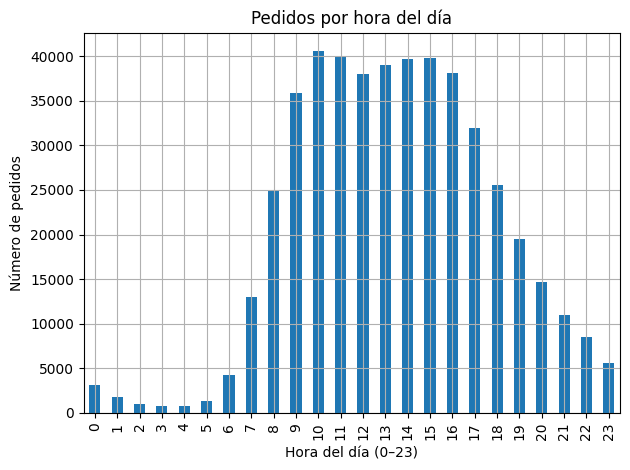

In [10]:
import pandas as pd
from matplotlib import pyplot as plt

# Contar pedidos por hora del día
orders_by_hour = orders['order_hour_of_day'].value_counts().sort_index()
df_hour = pd.DataFrame({'order_hour': orders_by_hour.index, 'order_count': orders_by_hour.values})

# Graficar como barras
df_hour.plot(kind='bar', x='order_hour', y='order_count', title='Pedidos por hora del día', legend=False)
plt.xlabel('Hora del día (0–23)')
plt.ylabel('Número de pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede observar que la mayor cantidad de pedidos suceden entre las 10 a las 17 hrs, lo cual se infiere que son los horarios de desayuno y comida, bajando gradualmente para la noche, de igual manera se infiere que los horarios de los estableciemientos tambien influyen mucho ya que tanto muy temprano, como muy tarde muchos establecimientos ya no tienen servicio. 

### [A3] ¿Qué día de la semana compran víveres las personas?

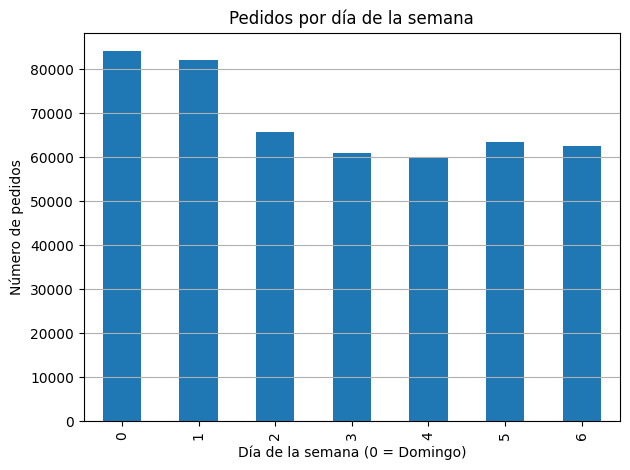

In [11]:

import pandas as pd
from matplotlib import pyplot as plt

# Contar pedidos por día de la semana
orders_by_day = orders['order_dow'].value_counts().sort_index()
df_day = pd.DataFrame({
    'day_of_week': orders_by_day.index,
    'order_count': orders_by_day.values
})

# Graficar como barras
df_day.plot(
    kind='bar',
    x='day_of_week',
    y='order_count',
    title='Pedidos por día de la semana',
    legend=False
)
plt.xlabel('Día de la semana (0 = Domingo)')
plt.ylabel('Número de pedidos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Podemos observar que los fines de semana es cuando hay mas pedidos, y por lo tanto se puede inferir que son los dias en los que la gente cocina menos, algo que pareceriera obvio y queda demostrado con el analisis de estos data frames 

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo al mostrar las órdenes por día de la semana. Efectivamente, la mayoría de clientes hacen sus compras al inicio de la semana, esto es un detalle interesante que nos ayuda a entender mejor el comportamiento de los clientes

</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

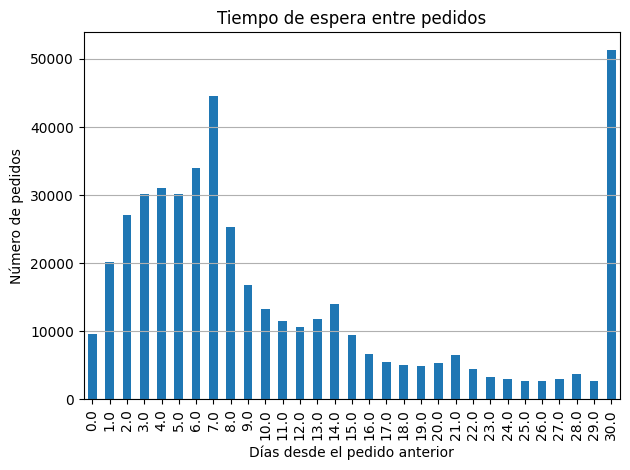

In [12]:
from matplotlib import pyplot as plt

# Contar cuántos pedidos hay según los días de espera
wait_times = orders['days_since_prior_order'].value_counts().sort_index()

# Crear un DataFrame para graficar
df_wait = pd.DataFrame({'days_waited': wait_times.index, 'order_count': wait_times.values})

# Graficar como barras
df_wait.plot(
    kind='bar',
    x='days_waited',
    y='order_count',
    title='Tiempo de espera entre pedidos',
    legend=False
)
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Podemos observar que posiblemente hay clientes muy habituales cuyo promedio de dias de espera es de 7 dias, lo cual podria demostrar que los usuarios tienden a pedir mas en fines de semana, no obstante, hay una gran cantidad de clientes muy ocasionales que solo lo hacen una vez al mes en promedio.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [39]:
from matplotlib import pyplot as plt

# Filtrar pedidos de miércoles (3) y sábado (5)
wed_orders = orders[orders['order_dow'] == 3]
sat_orders = orders[orders['order_dow'] == 5]

In [40]:
wed_counts = wed_orders['order_hour_of_day'].value_counts().sort_index()
sat_counts = sat_orders['order_hour_of_day'].value_counts().sort_index()


In [41]:
# Crear DataFrame para graficar
df_compare = pd.DataFrame({
    'Hora del día': wed_counts.index,
    'Miércoles': wed_counts.values,
    'Sábado': sat_counts.values
})

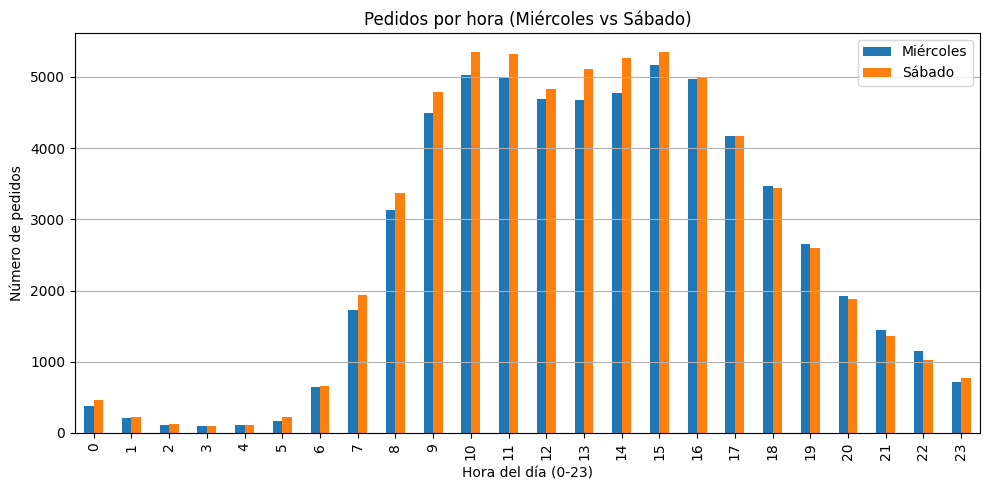

In [42]:
df_compare.plot(x='Hora del día', y=['Miércoles', 'Sábado'], kind='bar', title='Pedidos por hora (Miércoles vs Sábado)', figsize=(10, 5))
plt.xlabel('Hora del día (0-23)')
plt.ylabel('Número de pedidos')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Podemos observar que los patrones de los usuarios es casi identico sin importar el dia, y que los horarios en los que hay mas recurrencia son en la hora del desayuno y la comida, no obstante, vemos que sin ninguna sorpresa, el sabado es cuando los usuarios tienden a ordenar un poco mas respecto al miercoles, demostrando un poco mas la teoria de que los fines de semana los usuarios estan mas activos 

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [43]:
from matplotlib import pyplot as plt

# Contar la cantidad de pedidos por cliente
orders_per_user = orders['user_id'].value_counts()

# Contar cuántos clientes hicieron 1, 2, 3... pedidos
orders_distribution = orders_per_user.value_counts().sort_index()

# Crear DataFrame para graficar
df_orders_dist = pd.DataFrame({
    'Número de pedidos': orders_distribution.index,
    'Cantidad de clientes': orders_distribution.values
})

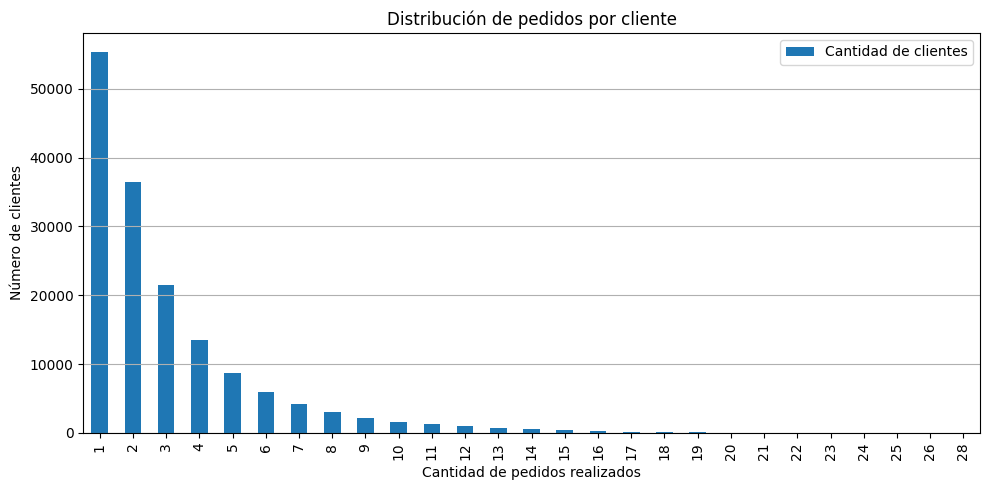

In [44]:
df_orders_dist.plot(x='Número de pedidos', y='Cantidad de clientes', kind='bar', title='Distribución de pedidos por cliente', figsize=(10, 5))
plt.xlabel('Cantidad de pedidos realizados')
plt.ylabel('Número de clientes')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Podemos observar que la mayoria de usuarios son primerizos, entonces quizas la aplicacion no tiene clientes tan leales, y solo es usada por emergencia de un dia

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
top_products = order_products['product_id'].value_counts().head(20)


In [46]:
top_products_df = pd.DataFrame({'product_id': top_products.index, 'count': top_products.values})
top_products_df = top_products_df.merge(products[['product_id', 'product_name']], on='product_id')

In [47]:
print(top_products_df[['product_id', 'product_name', 'count']])

    product_id              product_name  count
0        24852                    Banana  66050
1        13176    Bag of Organic Bananas  53297
2        21137      Organic Strawberries  37039
3        21903      Organic Baby Spinach  33971
4        47209      Organic Hass Avocado  29773
5        47766           Organic Avocado  24689
6        47626               Large Lemon  21495
7        16797              Strawberries  20018
8        26209                     Limes  19690
9        27845        Organic Whole Milk  19600
10       27966       Organic Raspberries  19197
11       22935      Organic Yellow Onion  15898
12       24964            Organic Garlic  15292
13       45007          Organic Zucchini  14584
14       39275       Organic Blueberries  13879
15       49683            Cucumber Kirby  13675
16       28204        Organic Fuji Apple  12544
17        5876             Organic Lemon  12232
18        8277  Apple Honeycrisp Organic  11993
19       40706    Organic Grape Tomatoes

Analizamos el historial de pedidos de Instacart para identificar los productos más populares. Contamos cuántas veces se pidió cada producto y combinamos esta información con sus nombres para obtener un top de los 20 productos más solicitados. Esto nos ayuda a entender las preferencias de compra de los clientes y de igual manera entender algunos patrones, o establecer algunas hipotesis, como lo es por ejemplo, que los clientes podrian hacer algunas compras de su despensa a traves de la aplicacion, para evitar salir por ella a mercados y super mercados 

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64


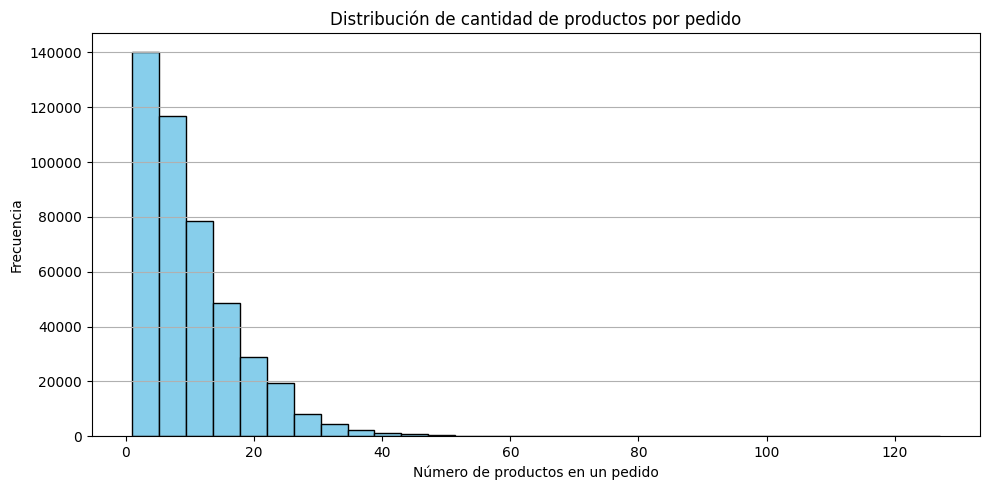

In [13]:
from matplotlib import pyplot as plt

# Contar cuántos productos hay en cada pedido
products_per_order = order_products.groupby('order_id')['product_id'].count()

# Mostrar estadísticas básicas
print(products_per_order.describe())

# Graficar histograma
plt.figure(figsize=(10, 5))
plt.hist(products_per_order, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de cantidad de productos por pedido')
plt.xlabel('Número de productos en un pedido')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Se puede inferir que las personas suelen comprar alrededor de 7 artículos por pedido, con la mayoría de los pedidos conteniendo entre 20 y 5 productos. Sin embargo, hay casos extraordinarios como un usuario con hasta 127 productos en un solo pedido.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [50]:
reordered_products = order_products[order_products['reordered'] == 1]

In [51]:
top_reordered = reordered_products['product_id'].value_counts().head(20)

In [52]:
top_reordered_df = top_reordered.reset_index()
top_reordered_df.columns = ['product_id', 'reorder_count']

In [53]:
# Paso 4: unir con products para obtener el nombre del producto
top_reordered_named = top_reordered_df.merge(products[['product_id', 'product_name']], on='product_id', how='left')

# Paso 5: ordenar y seleccionar los 20 más reordenados
top_20_products = top_reordered_named.sort_values(by='reorder_count', ascending=False).head(20)

# Mostrar resultado
print(top_20_products)

    product_id  reorder_count              product_name
0        24852          55763                    Banana
1        13176          44450    Bag of Organic Bananas
2        21137          28639      Organic Strawberries
3        21903          26233      Organic Baby Spinach
4        47209          23629      Organic Hass Avocado
5        47766          18743           Organic Avocado
6        27845          16251        Organic Whole Milk
7        47626          15044               Large Lemon
8        27966          14748       Organic Raspberries
9        16797          13945              Strawberries
10       26209          13327                     Limes
11       22935          11145      Organic Yellow Onion
12       24964          10411            Organic Garlic
13       45007          10076          Organic Zucchini
14       49683           9538            Cucumber Kirby
15       28204           8989        Organic Fuji Apple
16        8277           8836  Apple Honeycrisp 

Podemos observar que los productos que mas se reordenan son productos de la canasta basica, es decir, en su mayoria frutas o variantes de las mismas que son ingredientes basicos en las familias y que ademas sirven como complemento en muchos otros alimentos mas en el dia a dia, por lo tanto tiene sentido que los usuarios los sigan reordenando 

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [15]:
# 1. Agrupar por producto_id y calcular cuántas veces fue pedido y cuántas veces fue reordenado
product_reorder_stats = order_products.groupby('product_id').agg(
    total_orders=('reordered', 'count'),
    total_reorders=('reordered', 'sum')
)

In [16]:
product_reorder_stats['reorder_ratio'] = product_reorder_stats['total_reorders'] / product_reorder_stats['total_orders']

# 3. Unir con los nombres de los productos
product_reorder_stats = product_reorder_stats.merge(products[['product_id', 'product_name']], on='product_id', how='left')

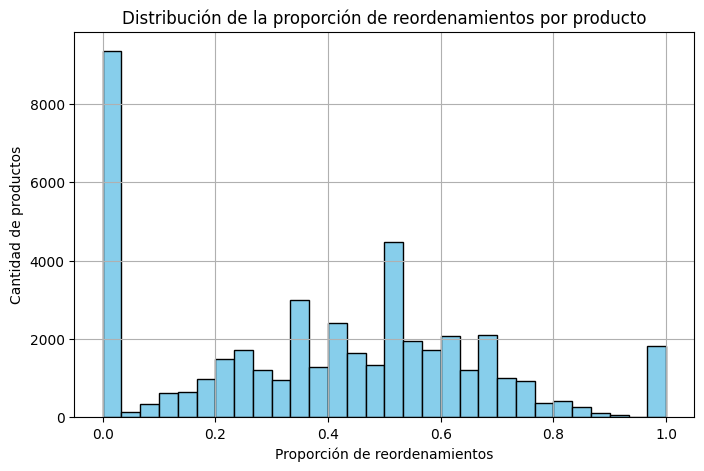

In [18]:
# 3. Mostrar top 20 productos con mayor proporción de reordenamientos
product_reorder_stats_sorted = product_reorder_stats.sort_values(by='reorder_ratio', ascending=False).reset_index(drop=True)


# 4. Graficar histograma de la proporción de reordenamientos
plt.figure(figsize=(8, 5))
plt.hist(product_reorder_stats['reorder_ratio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la proporción de reordenamientos por producto')
plt.xlabel('Proporción de reordenamientos')
plt.ylabel('Cantidad de productos')
plt.grid(True)
plt.show()

Se puede observar que los productos con el mejor radio, han sido en su mayoria muy poco reordenados, no obstante, si cabe el analisis, siempre sucede que alguien los vuelve a reordenar y esto podria ser por que al evaluar estos productos con un ratio=1 vemos que son productos que por el nombre se infiere son chatarra, con alta cantidad calorica y de azucar, mas estimulante y por lo tanto mas propenso a ser nuevamente consumido. Y los que estan en la barra de 1.0 probablemente son articulos que forman parte de productos que algunos usuraios compran cotidianamente 

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [20]:
orders_with_products = orders.merge(order_products, on='order_id', how='inner')

# 2. Agrupamos por cliente
client_reorder_stats = orders_with_products.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    total_reorders=('reordered', 'sum')
)

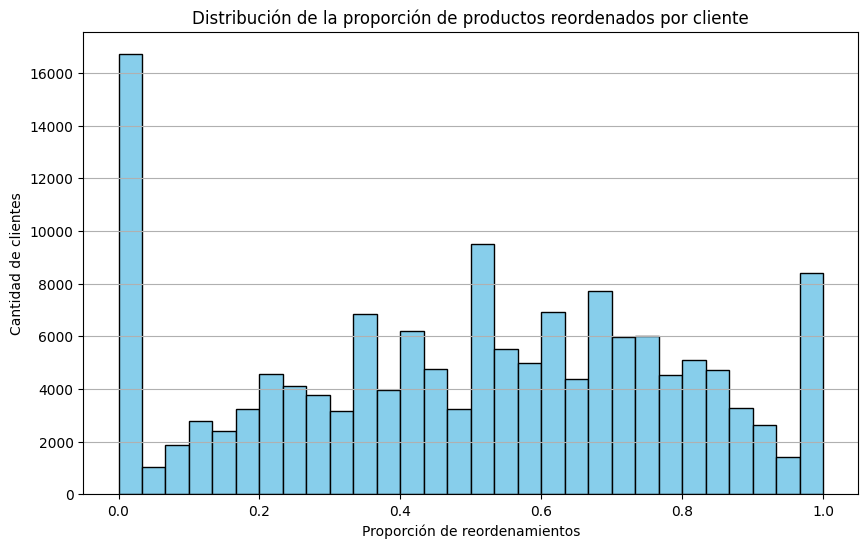

In [21]:
# 3. Calculamos proporción
client_reorder_stats['reorder_ratio'] = client_reorder_stats['total_reorders'] / client_reorder_stats['total_products']

# Mostramos los primeros resultados
client_reorder_stats.head(10)
plt.figure(figsize=(10,6))
plt.hist(client_reorder_stats['reorder_ratio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de la proporción de productos reordenados por cliente')
plt.xlabel('Proporción de reordenamientos')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y')
plt.show()

La mayoria de clintes por lo menos vuelven a reordenar el producto 1 vez, a excepciones por supuesto. pero segun la distribucion de la tabla, la mayoria vuelve a reordenar por lo menos una vez 

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [59]:
# Filtramos los productos que fueron agregados primero (add_to_cart_order == 1)
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]

# Contamos cuántas veces cada producto fue el primero en el carrito
primeros_count = primeros_productos['product_id'].value_counts().head(20)


In [60]:
# Lo convertimos a un DataFrame y le agregamos los nombres
top_20_primeros = primeros_count.reset_index()
top_20_primeros.columns = ['product_id', 'first_added_count']

# Unimos con la tabla de productos para obtener los nombres
top_20_primeros = top_20_primeros.merge(products[['product_id', 'product_name']], on='product_id', how='left')


In [61]:
print(top_20_primeros[['product_id', 'product_name', 'first_added_count']])

    product_id                 product_name  first_added_count
0        24852                       Banana              15562
1        13176       Bag of Organic Bananas              11026
2        27845           Organic Whole Milk               4363
3        21137         Organic Strawberries               3946
4        47209         Organic Hass Avocado               3390
5        21903         Organic Baby Spinach               3336
6        47766              Organic Avocado               3044
7        19660                 Spring Water               2336
8        16797                 Strawberries               2308
9        27966          Organic Raspberries               2024
10       44632   Sparkling Water Grapefruit               1914
11       49235          Organic Half & Half               1797
12       47626                  Large Lemon               1737
13         196                         Soda               1733
14       38689     Organic Reduced Fat Milk            

Segun los resultados, podemos reafirmar mi hipotesis de que los usuarios utilizan bastante la app para realizar compras de la canasta basica o productos necesarios para el dia a dia, en donde resaltan frutas, productos lacteos, cereales , un poco de verduras; de igual manera se podria decir que se ve una tendencia de los usuarios en las que prefieren evitar filas largas y visitas a los supermercados y optar por utilizar esta aplicacion que les ahorra tiempo, esfuerzo y dinero no se sabe, seria interesante ver el precio del servicio

### **Conclusión general del proyecto**

**Después de limpiar y analizar los datos de Instacart, podemos notar varios patrones importantes en el comportamiento de los usuarios. En general, la mayoría de las compras se hacen durante las mañanas y tardes, con picos claros en horarios de desayuno y comida. También se observa un aumento en los pedidos los fines de semana, teniendo los sábados como el dia mas recurrente, lo que sugiere que muchos usuarios aprovechan esos días para abastecerse.
La mayoría de los productos más pedidos son de la canasta básica: frutas, lácteos, cereales y verduras. Esto podria indicar que las personas usan la app principalmente para hacer sus compras esenciales de productos cotiadianos. Además, hay una tendencia fuerte a repetir pedidos, lo que muestra que muchos usuarios ya tienen hábitos definidos al comprar. Sin embargo, también encontramos que una gran parte de los usuarios solo hace un pedido, lo cual podría indicar que no todos vuelven a usar la app de forma regular, esto podria ser porque la ven como una solución puntual o de emergencia.
En general, el análisis sugiere que Instacart cumple una función útil para compras prácticas y rápidas, evitando visitas al supermercado. Aun así, hay oportunidades para mejorar la fidelidad de los clientes y reforzar su uso como parte de su rutina semanal.**